In [1482]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1483]:
data=pd.read_csv('glassdoor_jobs.csv')

In [1484]:
data.shape

(956, 15)

In [1485]:
data=data.iloc[:,1:]

In [1486]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [1487]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,956.0,3.601255,1.067619,-1.0,3.3,3.8,4.2,5.0
Founded,956.0,1774.605649,598.942517,-1.0,1937.0,1992.0,2008.0,2019.0


NAN values are replaced by -1 in the numerical features

In [1489]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          956 non-null    object 
 1   Salary Estimate    956 non-null    object 
 2   Job Description    956 non-null    object 
 3   Rating             956 non-null    float64
 4   Company Name       956 non-null    object 
 5   Location           956 non-null    object 
 6   Headquarters       956 non-null    object 
 7   Size               956 non-null    object 
 8   Founded            956 non-null    int64  
 9   Type of ownership  956 non-null    object 
 10  Industry           956 non-null    object 
 11  Sector             956 non-null    object 
 12  Revenue            956 non-null    object 
 13  Competitors        956 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 104.7+ KB


# EXPLORITORY DATA ANALYSIS AND DATA CLEANING

C:\Users\ranga\AppData\Local\Temp\ipykernel_4792\4289007074.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=data['Rating'])


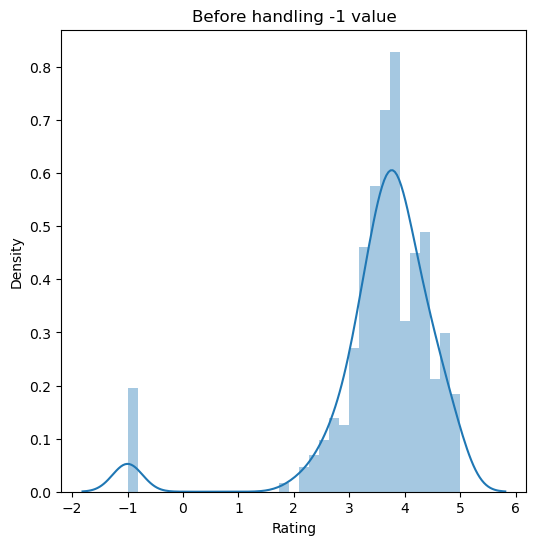

In [1491]:
# Visualising Rating column
plt.figure(figsize=(6,6))
g = sns.distplot(a=data['Rating'])
p = plt.title('Before handling -1 value')

SINCE THE RATING COLUMN FOLLOWING GAUSSIAN DISTRIBUTION , WE WILL REPLACE THE -1 VALUES WITH MWAN OF THE DATA

In [1493]:
data['Rating']=data['Rating'].apply(lambda x:np.NaN if x==-1 else x)

In [1494]:
data['Rating']=data['Rating'].fillna(data['Rating'].mean())

C:\Users\ranga\AppData\Local\Temp\ipykernel_4792\2327460705.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=data['Rating'])


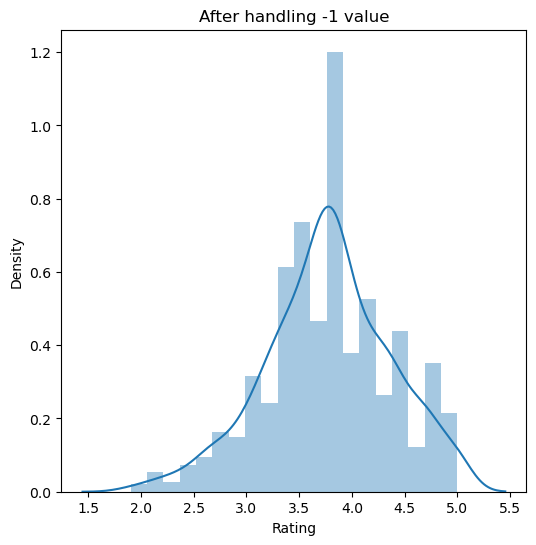

In [1495]:
plt.figure(figsize=(6,6))
g = sns.distplot(a=data['Rating'])
p = plt.title('After handling -1 value')

C:\Users\ranga\AppData\Local\Temp\ipykernel_4792\2733521045.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Rating', data=data, orient='v', palette='Set1')


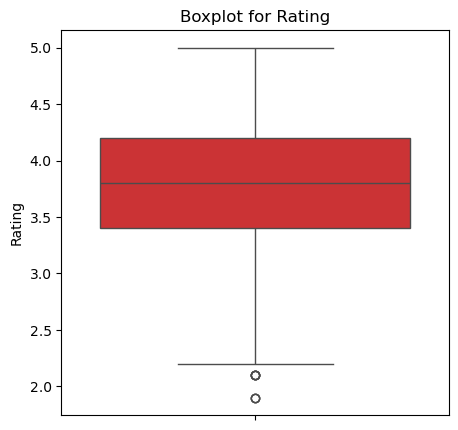

In [1496]:
# Outliers in Rating
plt.figure(figsize=(5,5))
sns.boxplot(y='Rating', data=data, orient='v', palette='Set1')
p = plt.title('Boxplot for Rating')
p = plt.ylabel('Rating')

C:\Users\ranga\AppData\Local\Temp\ipykernel_4792\4031875091.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s=sns.distplot(a=data['Founded'])


Text(0.5, 1.0, 'before handling -1 values')

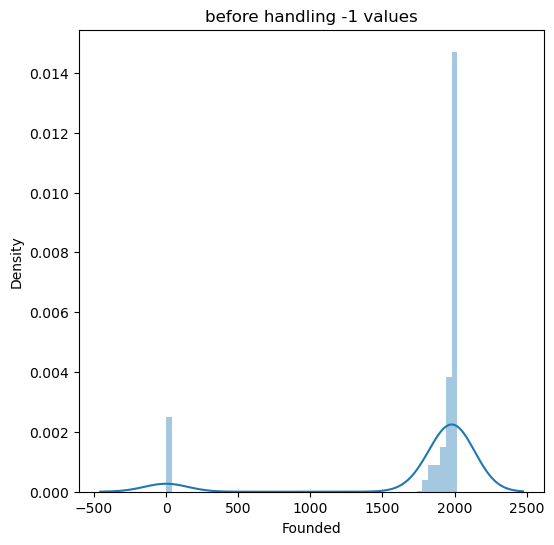

In [1497]:
#visualizing founded column
plt.figure(figsize=(6,6))
s=sns.distplot(a=data['Founded'])
plt.title('before handling -1 values')

 Since Founded feature does not follow Gaussian/Normal distribution but is Right-Skewed graph, we'll replacing the -1 values with median of the distribution.

In [1499]:
data['Founded']=data['Founded'].apply(lambda x: np.NAN if x==-1 else x)
data['Founded']=data['Founded'].fillna(data['Founded'].median())

C:\Users\ranga\AppData\Local\Temp\ipykernel_4792\823549885.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=data['Founded'])


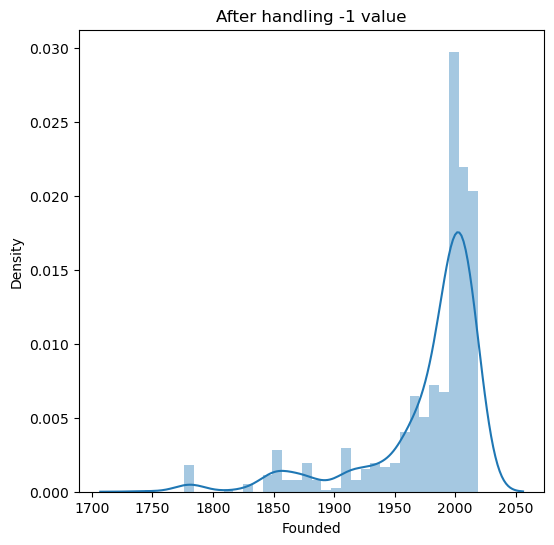

In [1500]:
data['Founded'] = data['Founded'].astype('int')

plt.figure(figsize=(6,6))
g = sns.distplot(a=data['Founded'])
p = plt.title('After handling -1 value')

Text(0, 0.5, 'Founded year')

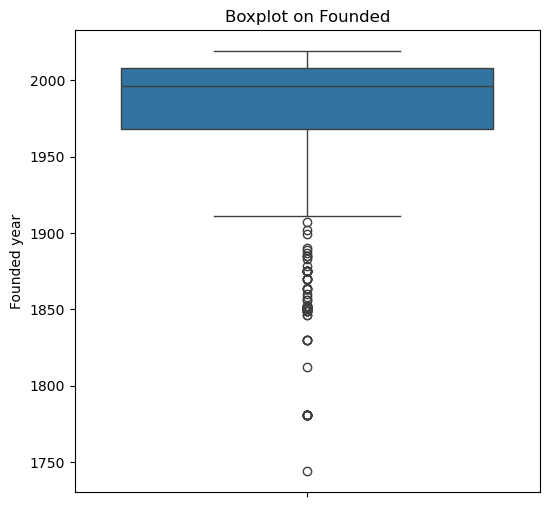

In [1501]:
#outliers in Founded column
plt.figure(figsize=(6,6))
sns.boxplot(data=data,y='Founded',orient='v')
p=plt.title('Boxplot on Founded')
plt.ylabel('Founded year')

In [1502]:
# Cleaning Job Title column
data['Job Title'].value_counts().nlargest(20)

Job Title
Data Scientist                                            178
Data Engineer                                              68
Senior Data Scientist                                      42
Data Analyst                                               18
Senior Data Engineer                                       17
Business Intelligence Analyst                              13
Senior Data Analyst                                        12
Lead Data Scientist                                         8
Data Science Manager                                        7
Principal Data Scientist                                    6
Machine Learning Engineer                                   6
Marketing Data Analyst                                      6
Sr. Data Engineer                                           6
Analytics Manager                                           5
Lead Data Engineer                                          5
Data Engineer 5 - Contract                                  

In [1503]:
len(data['Job Title'].unique())

328

In [1504]:
def title_changer(title):
    if 'data scientist' in title.lower() or 'scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'other'

In [1505]:
data['job_title'] = data['Job Title'].apply(title_changer)
data['job_title'].value_counts()

job_title
data scientist    560
data engineer     158
data analyst      105
other              72
manager            35
director           13
mle                13
Name: count, dtype: int64

C:\Users\ranga\AppData\Local\Temp\ipykernel_4792\3379811560.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


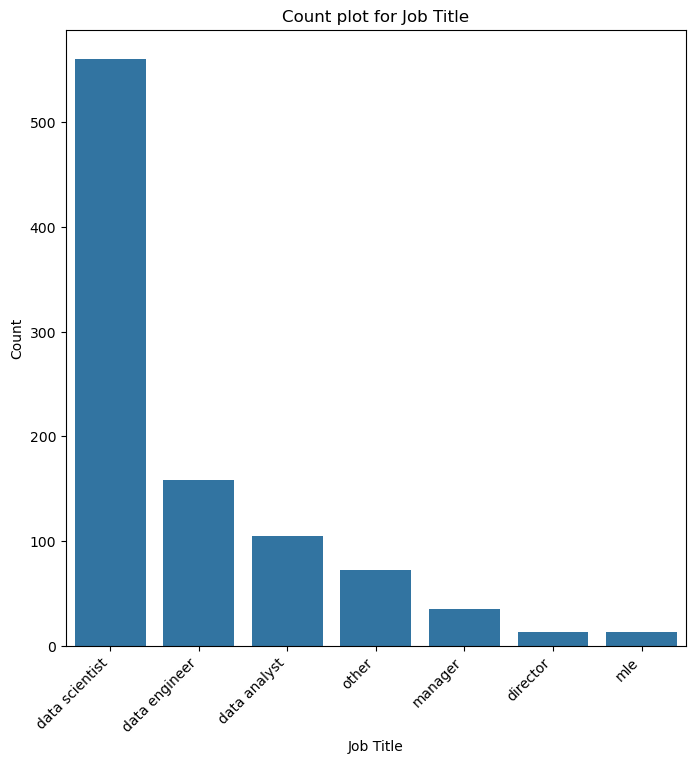

In [1506]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='job_title', data=data, order = data['job_title'].value_counts().index)
p = plt.title('Count plot for Job Title')
p = plt.xlabel('Job Title')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [1507]:
def title_seniority(title):
    if 'sr'in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'sr'
    elif 'jr' in title.lower() or 'junior' in title.lower():
        return 'jr'
    else:
        return 'other'

In [1508]:
data['job_seniority']=data['Job Title'].apply(title_seniority)
data['job_seniority'].value_counts()

job_seniority
other    687
sr       266
jr         3
Name: count, dtype: int64

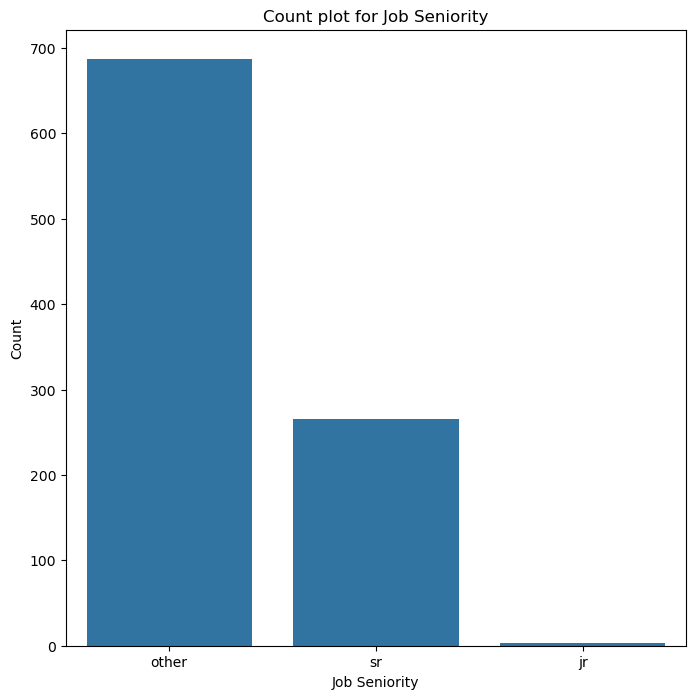

In [1509]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='job_seniority', data=data, order = data['job_seniority'].value_counts().index)
p = plt.title('Count plot for Job Seniority')
p = plt.xlabel('Job Seniority')
p = plt.ylabel('Count')

In [1510]:
#removing job title column
data.drop('Job Title',axis=1,inplace=True)

In [1511]:
#clearing Salary column
salary=data['Salary Estimate'].apply(lambda x:x.split('(')[0])
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
954             -1
955    $61K-$126K 
Name: Salary Estimate, Length: 956, dtype: object

In [1512]:
salary.value_counts()

Salary Estimate
-1                  214
$86K-$143K            6
$54K-$115K            6
$49K-$113K            6
$21-$34 Per Hour      6
                   ... 
$74K-$119K            1
$55K-$97K             1
$15K-$16K             1
$61K-$106K            1
$62K-$113K            1
Name: count, Length: 417, dtype: int64

In [1513]:
#remvong '$' and 'K' from 'Salary Estimate' column
salary=salary.apply(lambda x: x if type(x)==type(3.5) else x.replace('$','').replace('K',''))
salary

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
951    72-133 
952     56-91 
953    95-160 
954         -1
955    61-126 
Name: Salary Estimate, Length: 956, dtype: object

In [1514]:
salary = salary.apply(lambda x: np.NaN if x=='-1' else x)
salary

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
951    72-133 
952     56-91 
953    95-160 
954        NaN
955    61-126 
Name: Salary Estimate, Length: 956, dtype: object

In [1515]:
#checking for any inconsistences in Salaries
print(len(salary.unique()))
salary.unique()

417


array(['53-91 ', '63-112 ', '80-90 ', '56-97 ', '86-143 ', '71-119 ',
       '54-93 ', '86-142 ', '38-84 ', '120-160 ', '126-201 ', '64-106 ',
       '106-172 ', '46-85 ', '83-144 ', '102-190 ', '67-137 ', '118-189 ',
       '110-175 ', '64-111 ', '81-130 ', '73-119 ', '86-139 ', '63-105 ',
       nan, '109-177 ', '63-110 ', '75-124 ', '34-61 ', '72-120 ',
       '93-149 ', '85-140 ', '77-135 ', '82-132 ', '83-137 ', '115-180 ',
       '74-138 ', '64-112 ', '68-129 ', '52-113 ', '110-150',
       'Employer Provided Salary:150-160', '158-211 ', '20-39 ',
       '56-117 ', '63-99 ', '68-114 ', '41-95 ', '86-144 ', '80-139 ',
       '56-95 ', '120-189 ', '111-176 ', '84-146 ', '107-172 ', '49-85 ',
       '61-109 ', '88-148 ', '60-99 ', '41-72 ', '96-161 ', '65-130 ',
       '52-81 ', '139-220 ', '50-102 ', '85-139 ', '74-122 ', '99-157 ',
       '79-222 ', '57-118 ', '86-141 ', '94-154 ', '37-76 ', '100-160 ',
       '55-100 ', '60-114 ', '39-68 ', '64-107 ', '31-65 ', '34-62 ',
       '

#we can see few salaries are according to 'per hour' not 'per year' we have to convert those into 'per year',assuming 45 work hours per week and 52 working weeks), and also we have to remove the'Employer provided salary' in those remaining,we have few data point with little different format as ":" is present 


In [1517]:
salary=salary.apply(lambda x : x if type(x)==type(3.5) else x.lower().replace('employer provided salary',''))

In [1518]:
salary=salary.apply(lambda x:x if type(x)==type(3.5) else x.replace(':',''))

In [1519]:
# Converting per hour salaries to per year salaries
def hourly_to_yearly(minlimit, maxlimit):
    x = int(minlimit.strip()) * 45 * 52 // 1000  # Convert to yearly and round down
    y = int(maxlimit.strip()) * 45 * 52 // 1000
    return f'{x}-{y}'

salary = salary.apply(
    lambda x: 
    hourly_to_yearly(*x.lower().replace("per hour", "").split('-'))
    if isinstance(x, str) and "per hour" in x.lower()
    else x
)


In [1520]:
salary.unique()[380:]

array(['42-79 ', '84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ',
       '57-109 ', '136-208 ', '171-272 ', '65-126 ', '118-228 ',
       '113-182 ', '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ',
       '32-57 ', '79-136 ', '48-113 ', '63-109', '68-125 ', '39-67 ',
       '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ', '51-88 ',
       '101-141 ', '79-127 ', '81-132 ', '120-140', '65-113 ', '59-125 ',
       '80-142 ', '62-113 '], dtype=object)

C:\Users\ranga\AppData\Local\Temp\ipykernel_4792\364548206.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Salary'])


Text(0.5, 1.0, 'before handing NaN values')

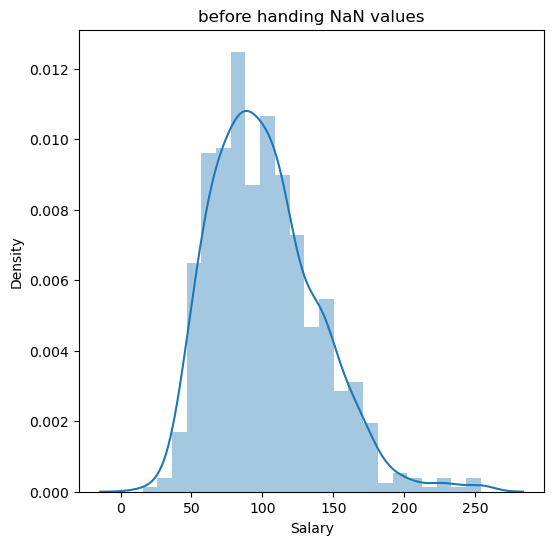

In [1521]:
data['Salary']=salary.apply(lambda x:x if type(x)==type(3.5) else (int(x.split('-')[0]) + int(x.split('-')[1].strip()))/2)

#visualizing salry column
plt.figure(figsize=(6,6))
sns.distplot(data['Salary'])
plt.title('before handing NaN values')

Here Salary column follows noraml distribution but it has few outliers so we will replace the NaN values by median

C:\Users\ranga\AppData\Local\Temp\ipykernel_4792\638745589.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=data['Salary'])


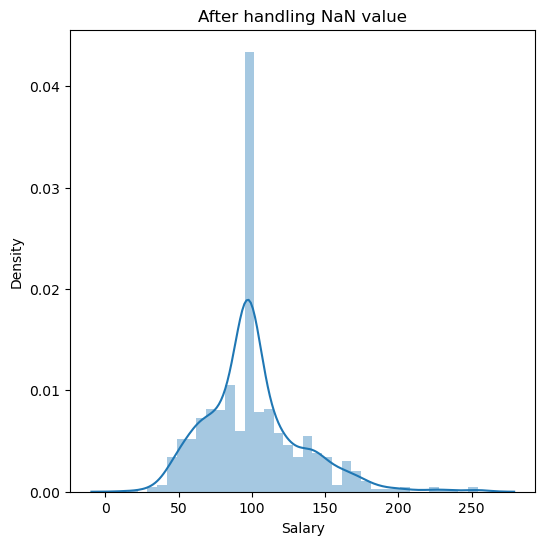

In [1523]:
# Handling NaN values in Salary column
data['Salary'] = data['Salary'].fillna(data['Salary'].median())

plt.figure(figsize=(6,6))
g = sns.distplot(a=data['Salary'])
p = plt.title('After handling NaN value')

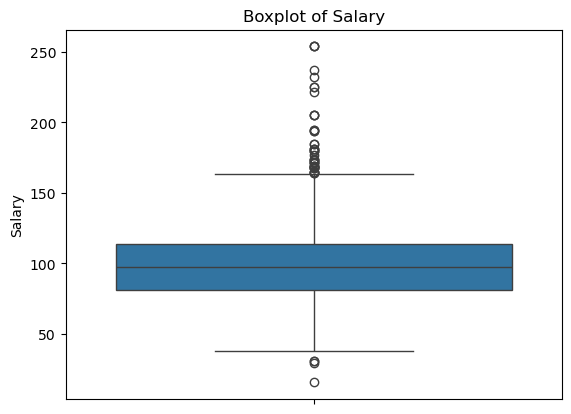

In [1524]:
#outliers in salary
sns.boxplot(data=data,y='Salary')
plt.title('Boxplot of Salary')
plt.ylabel('Salary')
plt.show()

In [1526]:
#cleaning the column "Campany Name"
data['Company Name']=data['Company Name'].apply(lambda x:x.split('\n')[0])

Text(0.5, 1.0, 'top 20 companies')

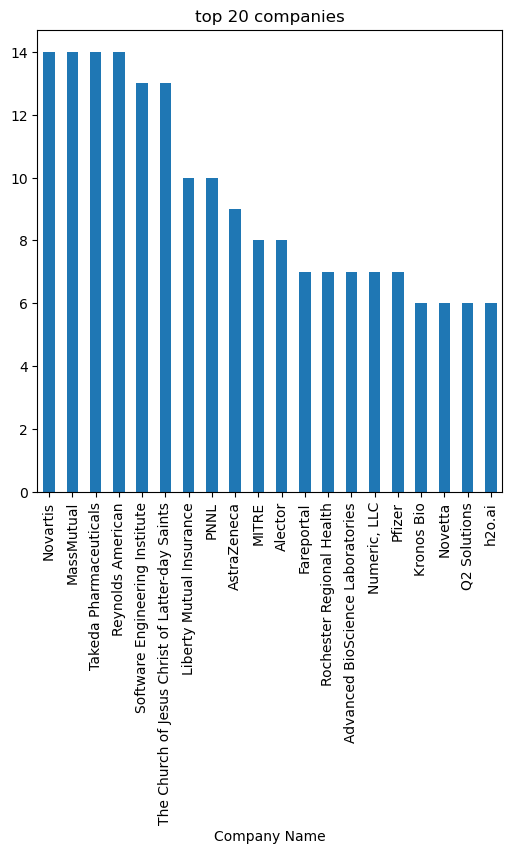

In [1527]:
plt.figure(figsize=(6,6))
data['Company Name'].value_counts().nlargest(20).plot.bar()
plt.title('top 20 companies')

In [1528]:
#column for job state
data['State']=data['Location'].apply(lambda x:x if ',' not in x else x.split(',')[1].strip())

In [1529]:
len(data['State'].unique())

46

Text(0.5, 1.0, 'top 20 job located States')

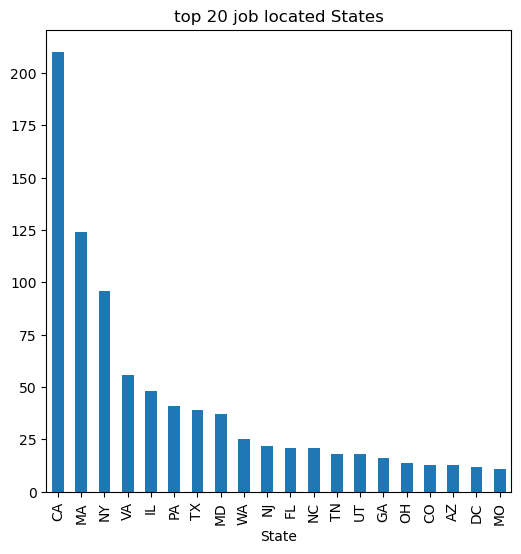

In [1530]:
plt.figure(figsize=(6,6))
data['State'].value_counts().nlargest(20).plot.bar()
plt.title('top 20 job located States')

In [1531]:
data['Size'].value_counts()

Size
1001 to 5000 employees     177
201 to 500 employees       160
51 to 200 employees        155
10000+ employees           154
501 to 1000 employees      144
5001 to 10000 employees     79
1 to 50 employees           61
Unknown                     15
-1                          11
Name: count, dtype: int64

In [1532]:
#cleaning size column
def size_editor(text):
    if '-1' in text.lower():
        return 'Unknown'
    else:
        return text

data['Size']=data['Size'].apply(size_editor)

Text(0, 0.5, 'Count')

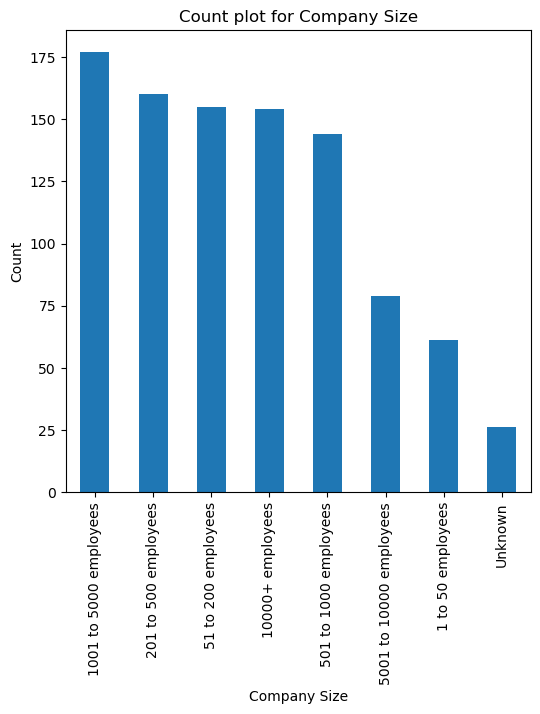

In [1533]:
#visualize the size column

plt.figure(figsize=(6,6))
data['Size'].value_counts().plot.bar()
plt.title('Count plot for Company Size')
plt.xlabel('Company Size')
plt.ylabel('Count')


In [1534]:
data['Type of ownership'].value_counts()

Type of ownership
Company - Private                 532
Company - Public                  237
Nonprofit Organization             65
Subsidiary or Business Segment     40
Government                         17
Hospital                           15
College / University               15
Unknown                            11
-1                                 11
Other Organization                  5
Contract                            5
School / School District            2
Private Practice / Firm             1
Name: count, dtype: int64

In [1535]:
#cleaning the ownership column
def ownership_cleaner(txt):
    if 'private' in txt.lower():
        return 'Private'
    elif 'public' in txt.lower():
        return 'Public'
    elif ('-1' in txt.lower()) or ('unknown' in txt.lower()) or ('contract' in txt.lower()) or ('school / school district' in txt.lower()) or ('private practice / firm' in txt.lower()):
        return 'Other Organization'
    else:
        return txt

data['Type of ownership']=data['Type of ownership'].apply(ownership_cleaner)

Text(0.5, 1.0, 'type of ownerships')

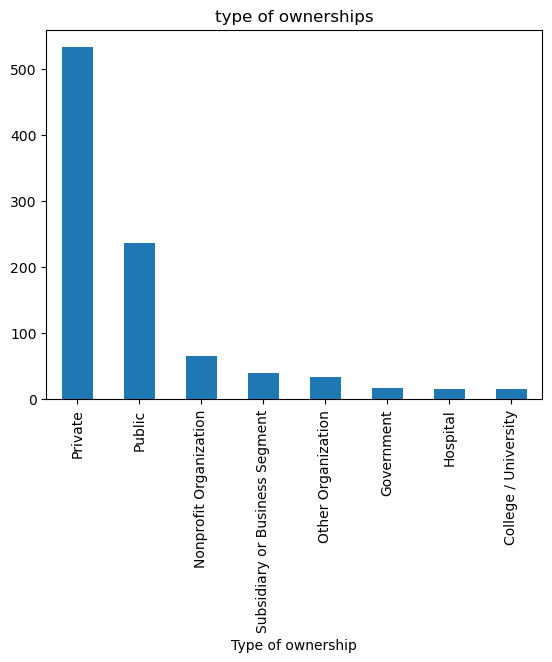

In [1536]:
#visualize the ownership column
data['Type of ownership'].value_counts().plot.bar()
plt.title('type of ownerships')

In [1537]:
data['Industry'].unique()

array(['Aerospace & Defense', 'Health Care Services & Hospitals',
       'Security Services', 'Energy', 'Advertising & Marketing',
       'Real Estate', 'Banks & Credit Unions', 'Consulting', 'Internet',
       'Other Retail Stores', 'Research & Development',
       'Department, Clothing, & Shoe Stores', 'Biotech & Pharmaceuticals',
       'Motion Picture Production & Distribution',
       'Enterprise Software & Network Solutions', 'Insurance Carriers',
       'Insurance Agencies & Brokerages', 'Logistics & Supply Chain',
       'Food & Beverage Manufacturing', 'Telecommunications Services',
       'IT Services', 'Computer Hardware & Software', '-1',
       'Consumer Products Manufacturing',
       'Investment Banking & Asset Management',
       'Industrial Manufacturing', 'Staffing & Outsourcing',
       'Metals Brokers', 'Financial Transaction Processing',
       'Sporting Goods Stores', 'Wholesale', 'Mining',
       'Financial Analytics & Research', 'Federal Agencies',
       'Educa

In [1538]:
#cleaning industry column
data['Industry']=data['Industry'].apply(lambda x: 'Others' if x=='-1' else x)

Text(0, 0.5, 'count')

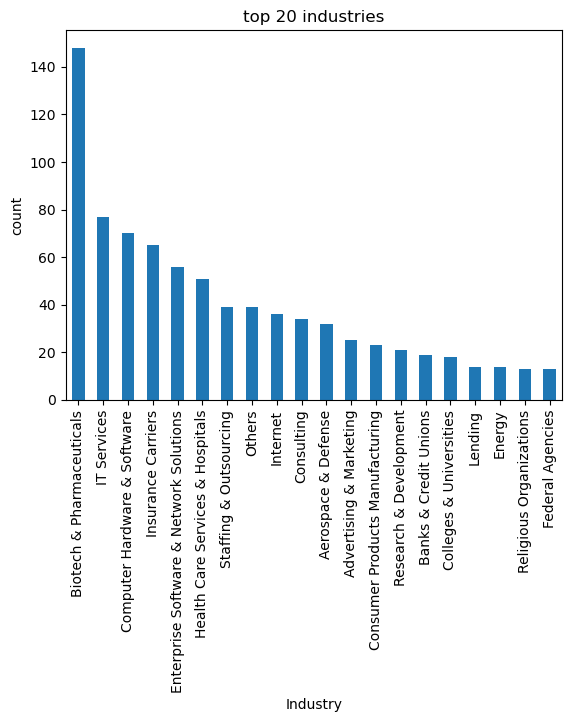

In [1539]:
#visuslize column Industry
data['Industry'].value_counts().nlargest(20).plot.bar()
plt.title('top 20 industries')
plt.xlabel('Industry')
plt.ylabel('count')

In [1540]:
data['Sector'].value_counts()

Sector
Information Technology                239
Biotech & Pharmaceuticals             148
Business Services                     134
Insurance                              71
Finance                                56
Health Care                            51
Manufacturing                          40
-1                                     39
Aerospace & Defense                    32
Education                              26
Retail                                 16
Non-Profit                             16
Oil, Gas, Energy & Utilities           15
Media                                  13
Government                             13
Transportation & Logistics              8
Real Estate                             8
Travel & Tourism                        8
Telecommunications                      6
Arts, Entertainment & Recreation        4
Construction, Repair & Maintenance      4
Consumer Services                       4
Mining & Metals                         3
Agriculture & Forestry     

In [1541]:
#visulize Sector column
data['Sector']=data['Sector'].apply(lambda x:'Others' if x=='-1' else x)

Text(0.5, 1.0, 'Sector')

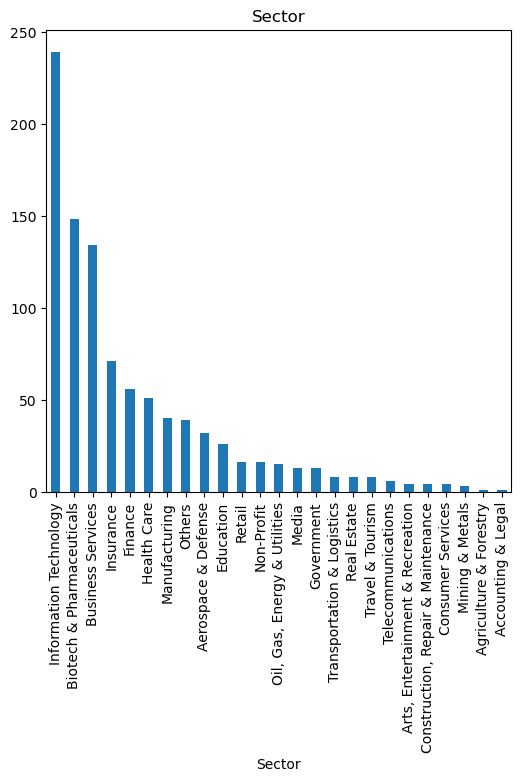

In [1542]:
plt.figure(figsize=(6,6))
data['Sector'].value_counts().plot.bar()
plt.title('Sector')

In [1543]:
data['Revenue'].value_counts()

Revenue
Unknown / Non-Applicable            299
$10+ billion (USD)                  140
$100 to $500 million (USD)          107
$1 to $2 billion (USD)               68
$500 million to $1 billion (USD)     62
$25 to $50 million (USD)             59
$50 to $100 million (USD)            52
$2 to $5 billion (USD)               44
$10 to $25 million (USD)             39
$5 to $10 million (USD)              29
$5 to $10 billion (USD)              20
$1 to $5 million (USD)               17
-1                                   11
Less than $1 million (USD)            9
Name: count, dtype: int64

In [1544]:
data['Revenue']=data['Revenue'].apply(lambda x: 'Unknown / Non-Applicable' if x== '-1' else x)

In [1545]:
#cleaning Competitoes column
data['Competitors'].value_counts()

Competitors
-1                                                                                              634
Novartis, Baxter, Pfizer                                                                         14
Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory     12
Travelers, Allstate, State Farm                                                                  10
Roche, GlaxoSmithKline, Novartis                                                                  9
                                                                                               ... 
Slalom, Cognizant Technology Solutions, Deloitte                                                  1
Greystar, The Related Companies, Prometheus Real Estate Group                                     1
Ecolab, Eurofin Private Investment Office                                                         1
USAA, Navy Federal Credit Union, Raymond James Financial                                

In [1546]:
data['Competitors']=data['Competitors'].apply(lambda x:len(x.split(',')) if x!='-1' else 0)

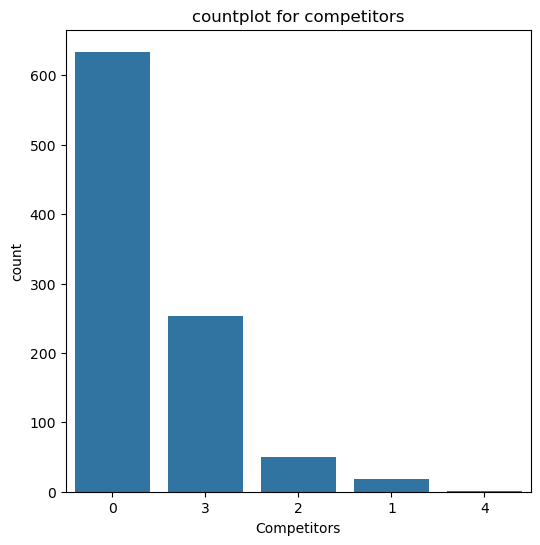

In [1547]:
plt.figure(figsize=(6,6))
sns.countplot(data=data,x='Competitors',order=data['Competitors'].value_counts().index)
plt.title('countplot for competitors')
plt.xlabel('Competitors')
plt.ylabel('count')
plt.show()

In [1548]:
data.head()

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,job_title,job_seniority,Salary,State
0,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,data scientist,other,72.0,NM
1,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,data scientist,other,87.5,MD
2,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Private,Security Services,Business Services,$100 to $500 million (USD),0,data scientist,other,85.0,FL
3,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,data scientist,other,76.5,WA
4,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,data scientist,other,114.5,NY


In [1549]:
#finding correlation between numerical columns
corr=data[['Rating','Founded','Salary']].corr()

<Axes: >

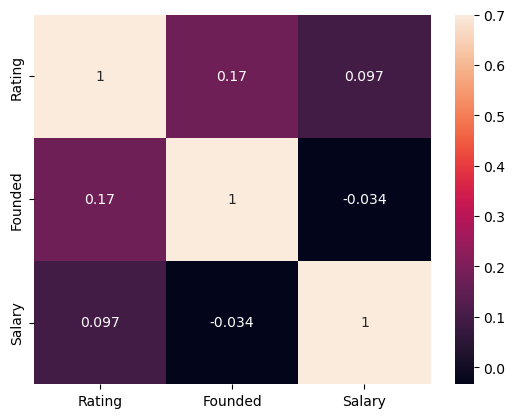

In [1550]:
sns.heatmap(corr,vmax=0.7,annot=True)

**INSIGHT:** Rating-Founded columns have positive correlation, whereas Salary-Founded columns have negative correlation. Also since the correlation is not high amongst all these numerical features, there is no case of multicolliniearity.

**FEATURE ENGINEERING** 

In [1554]:
data['jobs_at_headquarters'] = data.apply(lambda row: 1 if row['Location'] == row['Headquarters'] else 0, axis=1)


In [1555]:
data.head()

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,job_title,job_seniority,Salary,State,jobs_at_headquarters
0,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,data scientist,other,72.0,NM,0
1,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,data scientist,other,87.5,MD,0
2,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Private,Security Services,Business Services,$100 to $500 million (USD),0,data scientist,other,85.0,FL,1
3,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,data scientist,other,76.5,WA,1
4,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,data scientist,other,114.5,NY,1


In [1556]:
data.drop(labels=['Location'], axis=1, inplace=True)

from description we will check the job from its skills and categorized as python,SQl,excel,Tableau jobs

In [1558]:
data['python_jobs']=data['Job Description'].apply(lambda x:1 if 'python' in x.lower() else 0)
data['sql_jobs']=data['Job Description'].apply(lambda x:1 if 'sql' in x.lower() else 0)
data['excel_jobs']=data['Job Description'].apply(lambda x:1 if 'excel' in x.lower() else 0)
data['tableau_jobs']=data['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)

Text(0, 0.5, 'count')

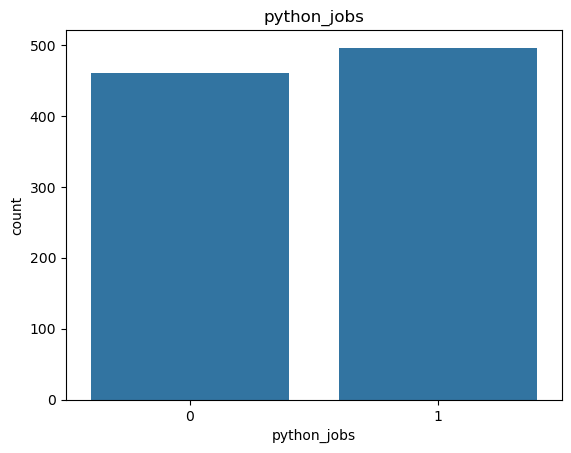

In [1559]:
#Visualize column python_jobs
sns.countplot(data=data,x='python_jobs')
plt.title('python_jobs')
plt.ylabel('count')

Text(0, 0.5, 'count')

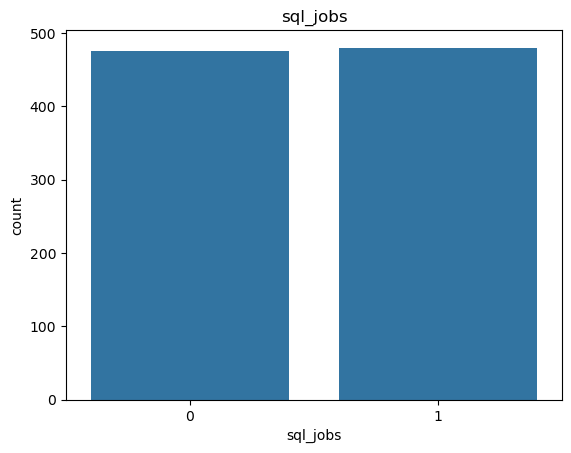

In [1560]:
#Visualize column sql_jobs
sns.countplot(data=data,x='sql_jobs')
plt.title('sql_jobs')
plt.ylabel('count')

Text(0, 0.5, 'count')

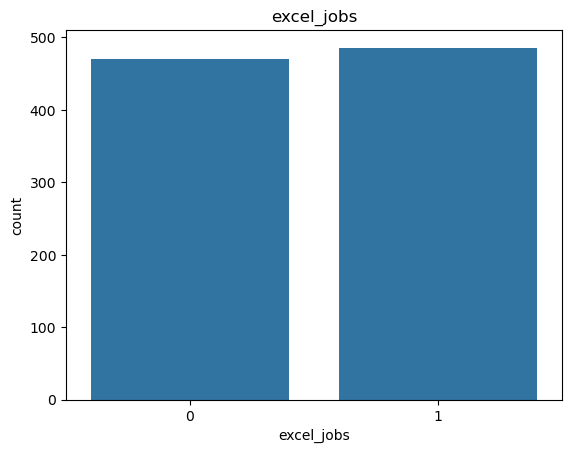

In [1561]:
#Visualize column excel_jobs
sns.countplot(data=data,x='excel_jobs')
plt.title('excel_jobs')
plt.ylabel('count')

Text(0, 0.5, 'count')

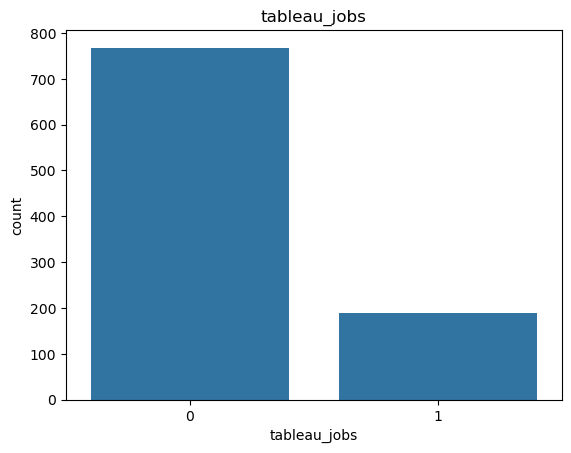

In [1562]:
#Visualize column tableau_jobs
sns.countplot(data=data,x='tableau_jobs')
plt.title('tableau_jobs')
plt.ylabel('count')

In [1563]:
data.drop('Job Description',axis=1,inplace=True)

TRIMMING COLUMNS : Features having more than 10 categories are trimmed so as to reduce the dimensionality.

In [1565]:
sector_list=data['Sector'].value_counts().nlargest(10).index
sector_list


Index(['Information Technology', 'Biotech & Pharmaceuticals',
       'Business Services', 'Insurance', 'Finance', 'Health Care',
       'Manufacturing', 'Others', 'Aerospace & Defense', 'Education'],
      dtype='object', name='Sector')

In [1566]:
data['Sector']=data['Sector'].apply(lambda x:x if x in sector_list else 'Others')

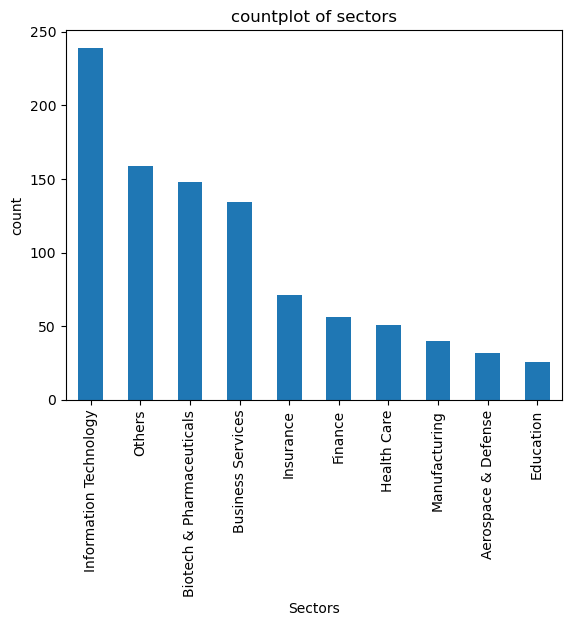

In [1567]:
#visualize sector column 
data['Sector'].value_counts().plot.bar()
plt.title('countplot of sectors')
plt.xlabel('Sectors')
plt.ylabel('count')
plt.show()

Text(0.5, 0, 'States')

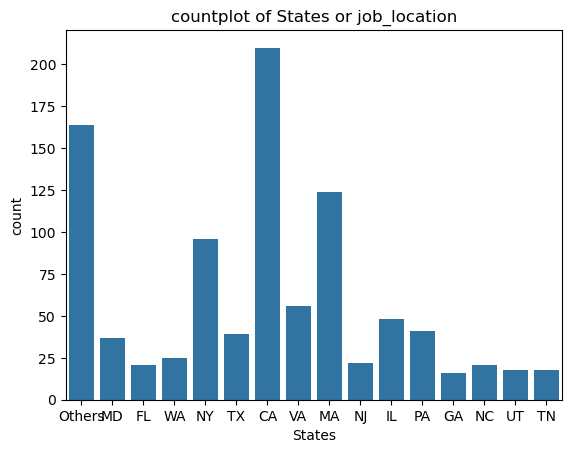

In [1568]:
#triming State column
# we will take top 1 states and combined remaining as others
State_list=data['State'].value_counts().nlargest(15).index
data['State']=data['State'].apply(lambda x: x if x in State_list else 'Others')

#visualize State column
sns.countplot(data=data,x='State')
plt.title('countplot of States or job_location')
plt.xlabel('States')


In [1569]:
data.columns

Index(['Salary Estimate', 'Rating', 'Company Name', 'Headquarters', 'Size',
       'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'job_title', 'job_seniority', 'Salary', 'State',
       'jobs_at_headquarters', 'python_jobs', 'sql_jobs', 'excel_jobs',
       'tableau_jobs'],
      dtype='object')

In [1570]:
data.drop(['Salary Estimate','Headquarters','Company Name','Industry','State'],axis=1,inplace=True)

In [1571]:
data.head()

,Rating,Size,Founded,Type of ownership,Sector,Revenue,Competitors,job_title,job_seniority,Salary,jobs_at_headquarters,python_jobs,sql_jobs,excel_jobs,tableau_jobs
0,3.8,501 to 1000 employees,1973,Private,Aerospace & Defense,$50 to $100 million (USD),0,data scientist,other,72.0,0,1,0,1,1
1,3.4,10000+ employees,1984,Other Organization,Health Care,$2 to $5 billion (USD),0,data scientist,other,87.5,0,1,0,0,0
2,4.8,501 to 1000 employees,2010,Private,Business Services,$100 to $500 million (USD),0,data scientist,other,85.0,1,1,1,1,0
3,3.8,1001 to 5000 employees,1965,Government,Others,$500 million to $1 billion (USD),3,data scientist,other,76.5,1,1,0,0,0
4,2.9,51 to 200 employees,1998,Private,Business Services,Unknown / Non-Applicable,3,data scientist,other,114.5,1,1,1,1,0


Handling the **Ordinal** Categorical Variables (categorical variables that can be ranked in order)

### handling Size column
data['Size'].unique()

In [1574]:
Size_map={'Unknown':0,'1 to 50 employees':1,'51 to 200 employees':2,'201 to 500 employees':3,'501 to 1000 employees':4,'1001 to 5000 employees':5,'5001 to 10000 employees':6,'10000+ employees':7}
data['Size']=data['Size'].map(Size_map)

In [1575]:
data['Size'].unique()

array([4, 7, 5, 2, 3, 6, 1, 0], dtype=int64)

In [1576]:
#handling Revenue column
data['Revenue'].unique()

array(['$50 to $100 million (USD)', '$2 to $5 billion (USD)',
       '$100 to $500 million (USD)', '$500 million to $1 billion (USD)',
       'Unknown / Non-Applicable', '$1 to $2 billion (USD)',
       '$25 to $50 million (USD)', '$10+ billion (USD)',
       '$1 to $5 million (USD)', '$10 to $25 million (USD)',
       '$5 to $10 billion (USD)', 'Less than $1 million (USD)',
       '$5 to $10 million (USD)'], dtype=object)

In [1577]:
# Mapping ranks to 'revenue	' column
revenue_map = {'Unknown / Non-Applicable': 0, 'Less than $1 million (USD)': 1, '$1 to $5 million (USD)': 2, '$5 to $10 million (USD)': 3,
            '$10 to $25 million (USD)': 4, '$25 to $50 million (USD)': 5, '$50 to $100 million (USD)': 6, '$100 to $500 million (USD)': 7,
            '$500 million to $1 billion (USD)': 8, '$1 to $2 billion (USD)': 9, '$2 to $5 billion (USD)':10, '$5 to $10 billion (USD)':11,
            '$10+ billion (USD)':12}

data['Revenue'] = data['Revenue'].map(revenue_map)

In [1670]:
data['Revenue'].unique()

array([ 6, 10,  7,  8,  0,  9,  5, 12,  2,  4, 11,  1,  3], dtype=int64)

In [1672]:
seniority_map={'other':0,'jr':1,'sr':2}

data['job_seniority']=data['job_seniority'].map(seniority_map)

Handling Nominal Categorical variables(categorical variable that can't be ranked)

In [1675]:
df=pd.get_dummies(data=data,columns=['Type of ownership','Sector','job_title'],drop_first=True,dtype=int)
pd.set_option('display.max_columns',None)
df.head()

,Rating,Size,Founded,Revenue,Competitors,job_seniority,Salary,jobs_at_headquarters,python_jobs,sql_jobs,excel_jobs,tableau_jobs,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_Private,Type of ownership_Public,Type of ownership_Subsidiary or Business Segment,Sector_Biotech & Pharmaceuticals,Sector_Business Services,Sector_Education,Sector_Finance,Sector_Health Care,Sector_Information Technology,Sector_Insurance,Sector_Manufacturing,Sector_Others,job_title_data engineer,job_title_data scientist,job_title_director,job_title_manager,job_title_mle,job_title_other
0,3.8,4,1973,6,0,0,72.0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,3.4,7,1984,10,0,0,87.5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,4.8,4,2010,7,0,0,85.0,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,3.8,5,1965,8,3,0,76.5,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,2.9,2,1998,0,3,0,114.5,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [1677]:
df.isnull().sum()

Rating                                              0
Size                                                0
Founded                                             0
Revenue                                             0
Competitors                                         0
job_seniority                                       0
Salary                                              0
jobs_at_headquarters                                0
python_jobs                                         0
sql_jobs                                            0
excel_jobs                                          0
tableau_jobs                                        0
Type of ownership_Government                        0
Type of ownership_Hospital                          0
Type of ownership_Nonprofit Organization            0
Type of ownership_Other Organization                0
Type of ownership_Private                           0
Type of ownership_Public                            0
Type of ownership_Subsidiary

In [1679]:
x=df.drop('Salary',axis=1)
y=df['Salary']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [1681]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
fs=SelectKBest(score_func=mutual_info_regression,k='all')
fs.fit(x,y)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x0000028156DDC540>)

C:\Users\ranga\AppData\Local\Temp\ipykernel_4792\2059267648.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')


[Text(0, 0, 'Rating'),
 Text(1, 0, 'Size'),
 Text(2, 0, 'Founded'),
 Text(3, 0, 'Revenue'),
 Text(4, 0, 'Competitors'),
 Text(5, 0, 'job_seniority'),
 Text(6, 0, 'jobs_at_headquarters'),
 Text(7, 0, 'python_jobs'),
 Text(8, 0, 'sql_jobs'),
 Text(9, 0, 'excel_jobs'),
 Text(10, 0, 'tableau_jobs'),
 Text(11, 0, 'Type of ownership_Government'),
 Text(12, 0, 'Type of ownership_Hospital'),
 Text(13, 0, 'Type of ownership_Nonprofit Organization'),
 Text(14, 0, 'Type of ownership_Other Organization'),
 Text(15, 0, 'Type of ownership_Private'),
 Text(16, 0, 'Type of ownership_Public'),
 Text(17, 0, 'Type of ownership_Subsidiary or Business Segment'),
 Text(18, 0, 'Sector_Biotech & Pharmaceuticals'),
 Text(19, 0, 'Sector_Business Services'),
 Text(20, 0, 'Sector_Education'),
 Text(21, 0, 'Sector_Finance'),
 Text(22, 0, 'Sector_Health Care'),
 Text(23, 0, 'Sector_Information Technology'),
 Text(24, 0, 'Sector_Insurance'),
 Text(25, 0, 'Sector_Manufacturing'),
 Text(26, 0, 'Sector_Others'),
 Text(

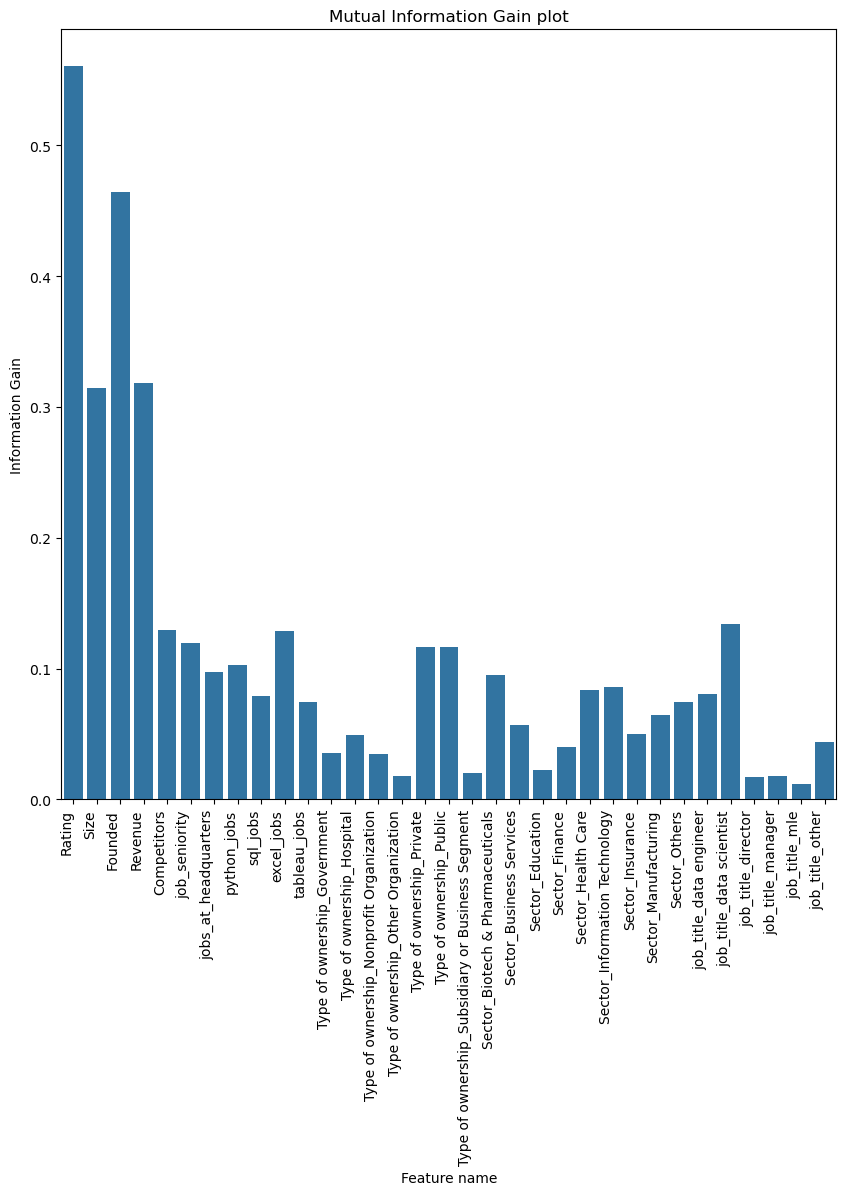

In [1683]:
plt.figure(figsize=(7,10))
g=sns.barplot(x=x.columns, y=fs.scores_)
plt.title('Mutual Information Gain plot')
plt.xlabel('Feature name')
plt.ylabel('Information Gain')
g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')

In [1685]:
feature_imp=pd.DataFrame(fs.scores_,columns=['Score'],index=x.columns)
feature_imp['Score'].sort_values(ascending=False)

Rating                                              0.560604
Founded                                             0.464638
Revenue                                             0.318151
Size                                                0.314312
job_title_data scientist                            0.134471
Competitors                                         0.129484
excel_jobs                                          0.128936
job_seniority                                       0.119239
Type of ownership_Private                           0.116536
Type of ownership_Public                            0.116229
python_jobs                                         0.102735
jobs_at_headquarters                                0.097073
Sector_Biotech & Pharmaceuticals                    0.095380
Sector_Information Technology                       0.085640
Sector_Health Care                                  0.083313
job_title_data engineer                             0.080976
sql_jobs                

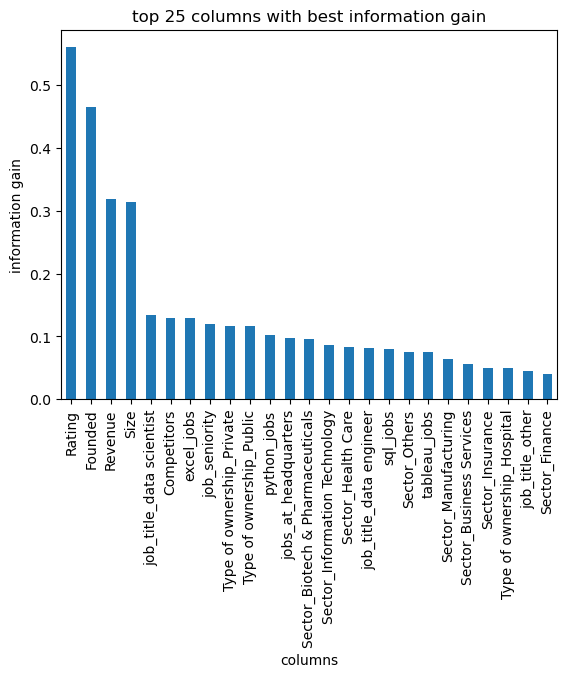

In [1687]:
feature_imp['Score'].nlargest(25).plot.bar()
plt.title('top 25 columns with best information gain')
plt.xlabel('columns')
plt.ylabel('information gain')
plt.show()

<Axes: >

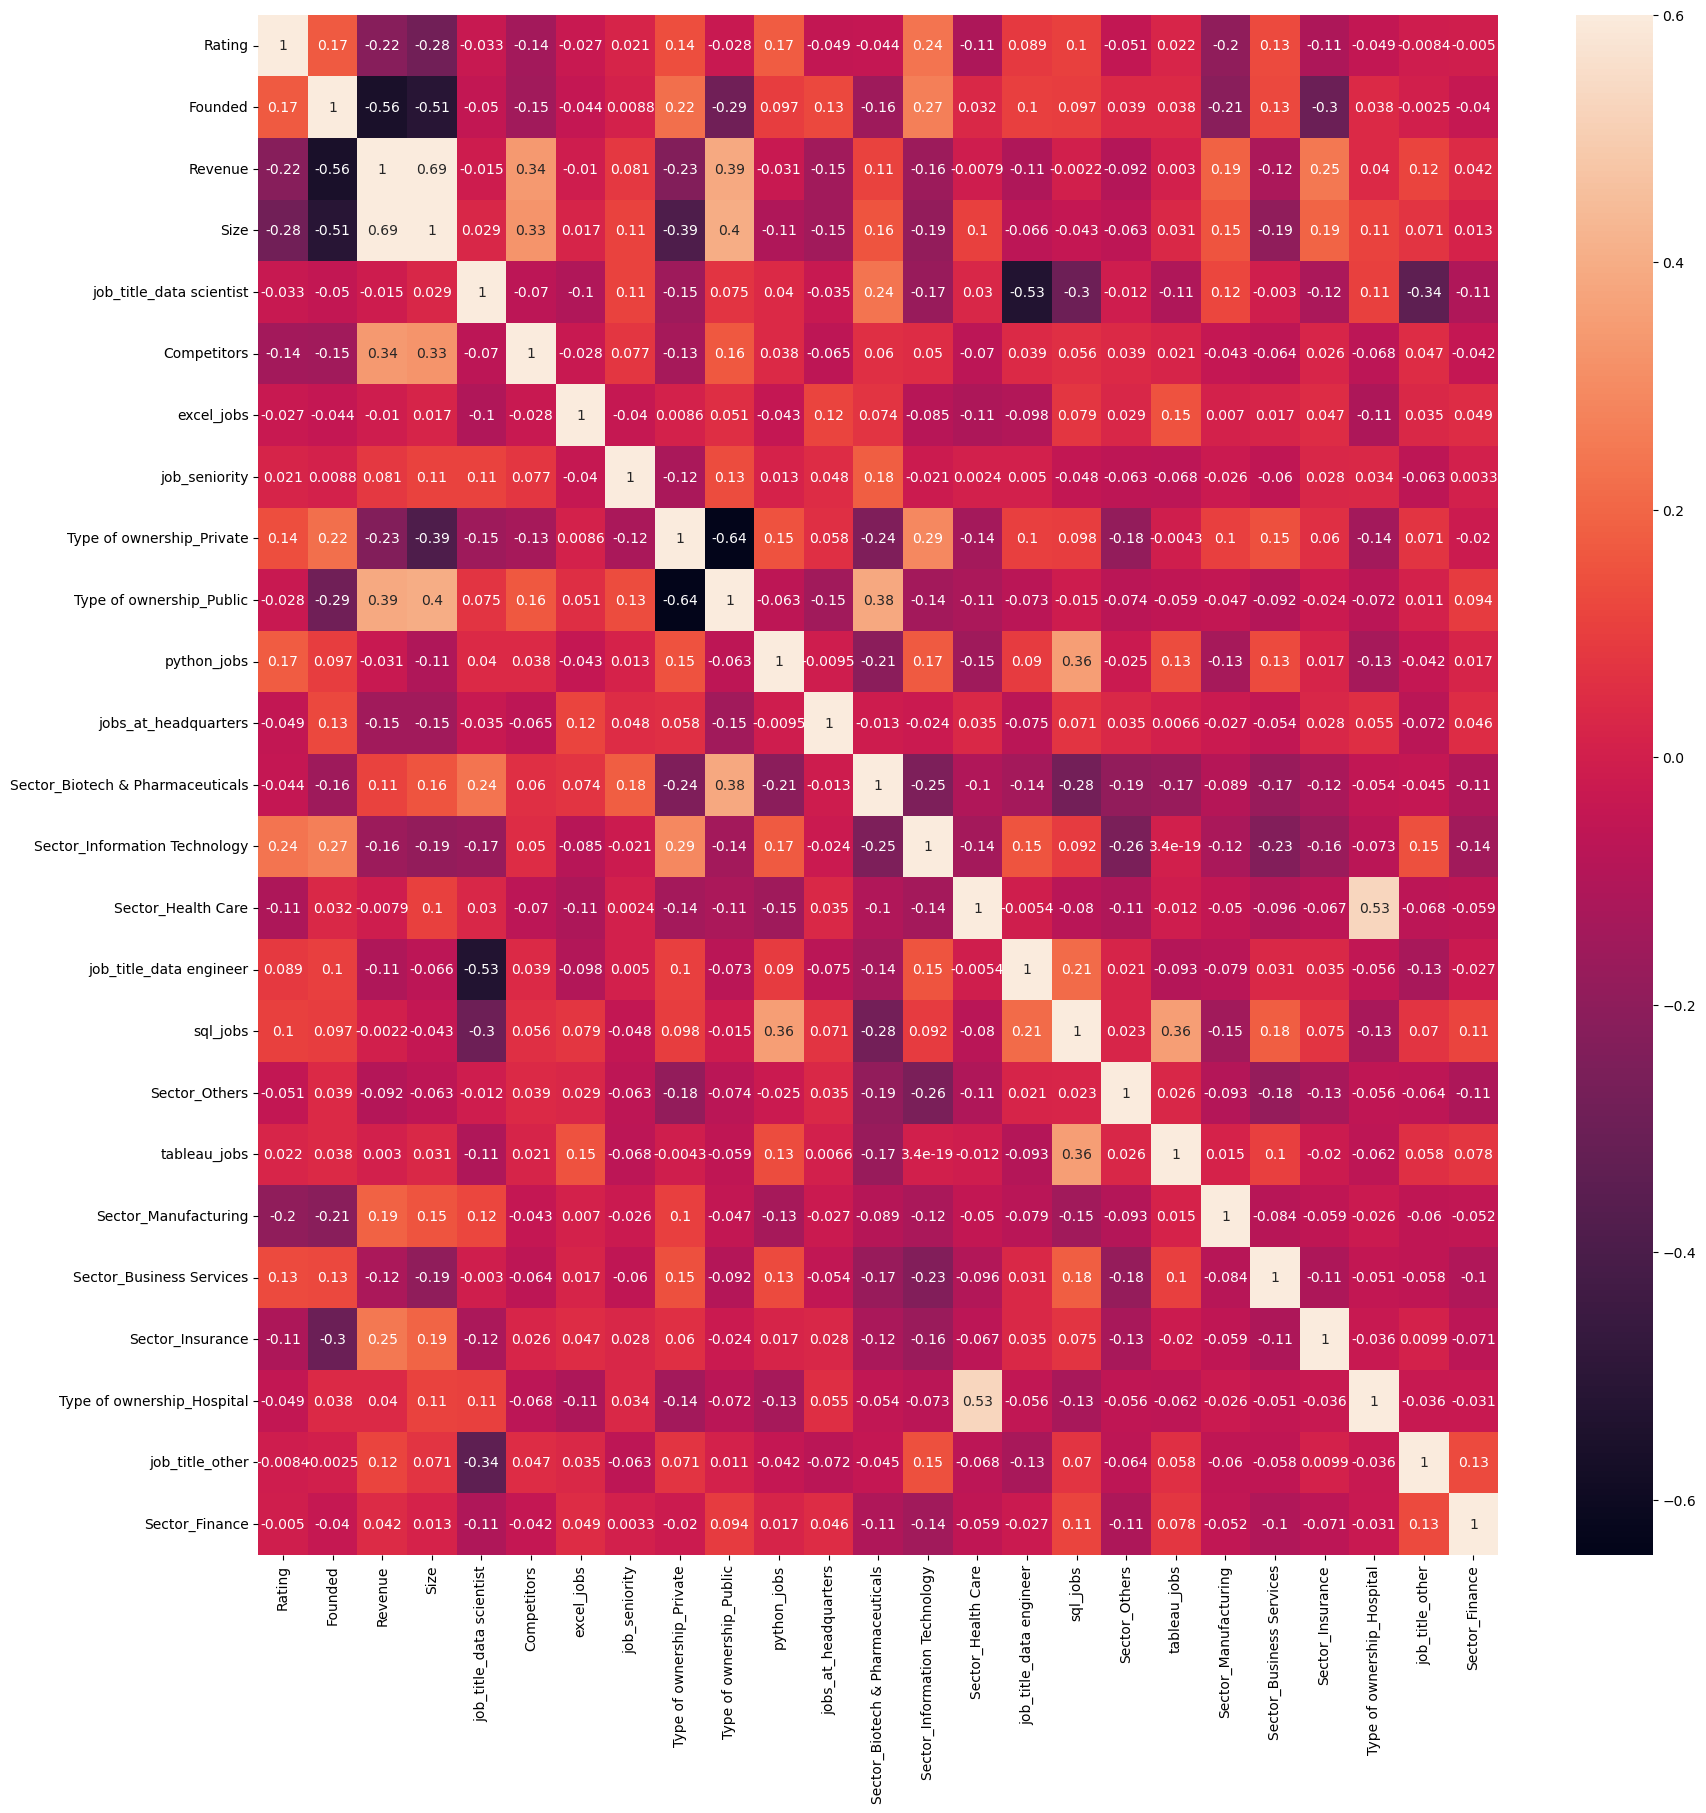

In [1689]:
top_cat=feature_imp['Score'].nlargest(25).index

#finding  and plotting the correlation between remaining columns
corr=x[top_cat].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,vmax=0.6)

**Range of correlation are as follows:**

**Strong correlation:** X > 0.7                                                            
**Moderate correlation:** 0.5 < X < 0.7                                                              
**Weak correlation:** X < 0.5                                               

HERE WE CAN SEE THAT **(Type of ownership_private - Type od ownership_public)**,**(Founded-Size)**,**(Founded-Revenue)**,**(job_title_data_engineer - job_title_data_scientist)** are moderatly correlated.  Hence, dropping 'Revenue', 'ownership_Public', 'job_title_data engineer' and 'Size' features.

In [1693]:
x=x[top_cat].drop(['Revenue','Type of ownership_Public','job_title_data engineer','Size'],axis=1)

In [1695]:
x.head()

,Rating,Founded,job_title_data scientist,Competitors,excel_jobs,job_seniority,Type of ownership_Private,python_jobs,jobs_at_headquarters,Sector_Biotech & Pharmaceuticals,Sector_Information Technology,Sector_Health Care,sql_jobs,Sector_Others,tableau_jobs,Sector_Manufacturing,Sector_Business Services,Sector_Insurance,Type of ownership_Hospital,job_title_other,Sector_Finance
0,3.8,1973,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,3.4,1984,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,4.8,2010,1,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0
3,3.8,1965,1,3,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0
4,2.9,1998,1,3,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0


Text(0.5, 1.0, 'correlation of columns')

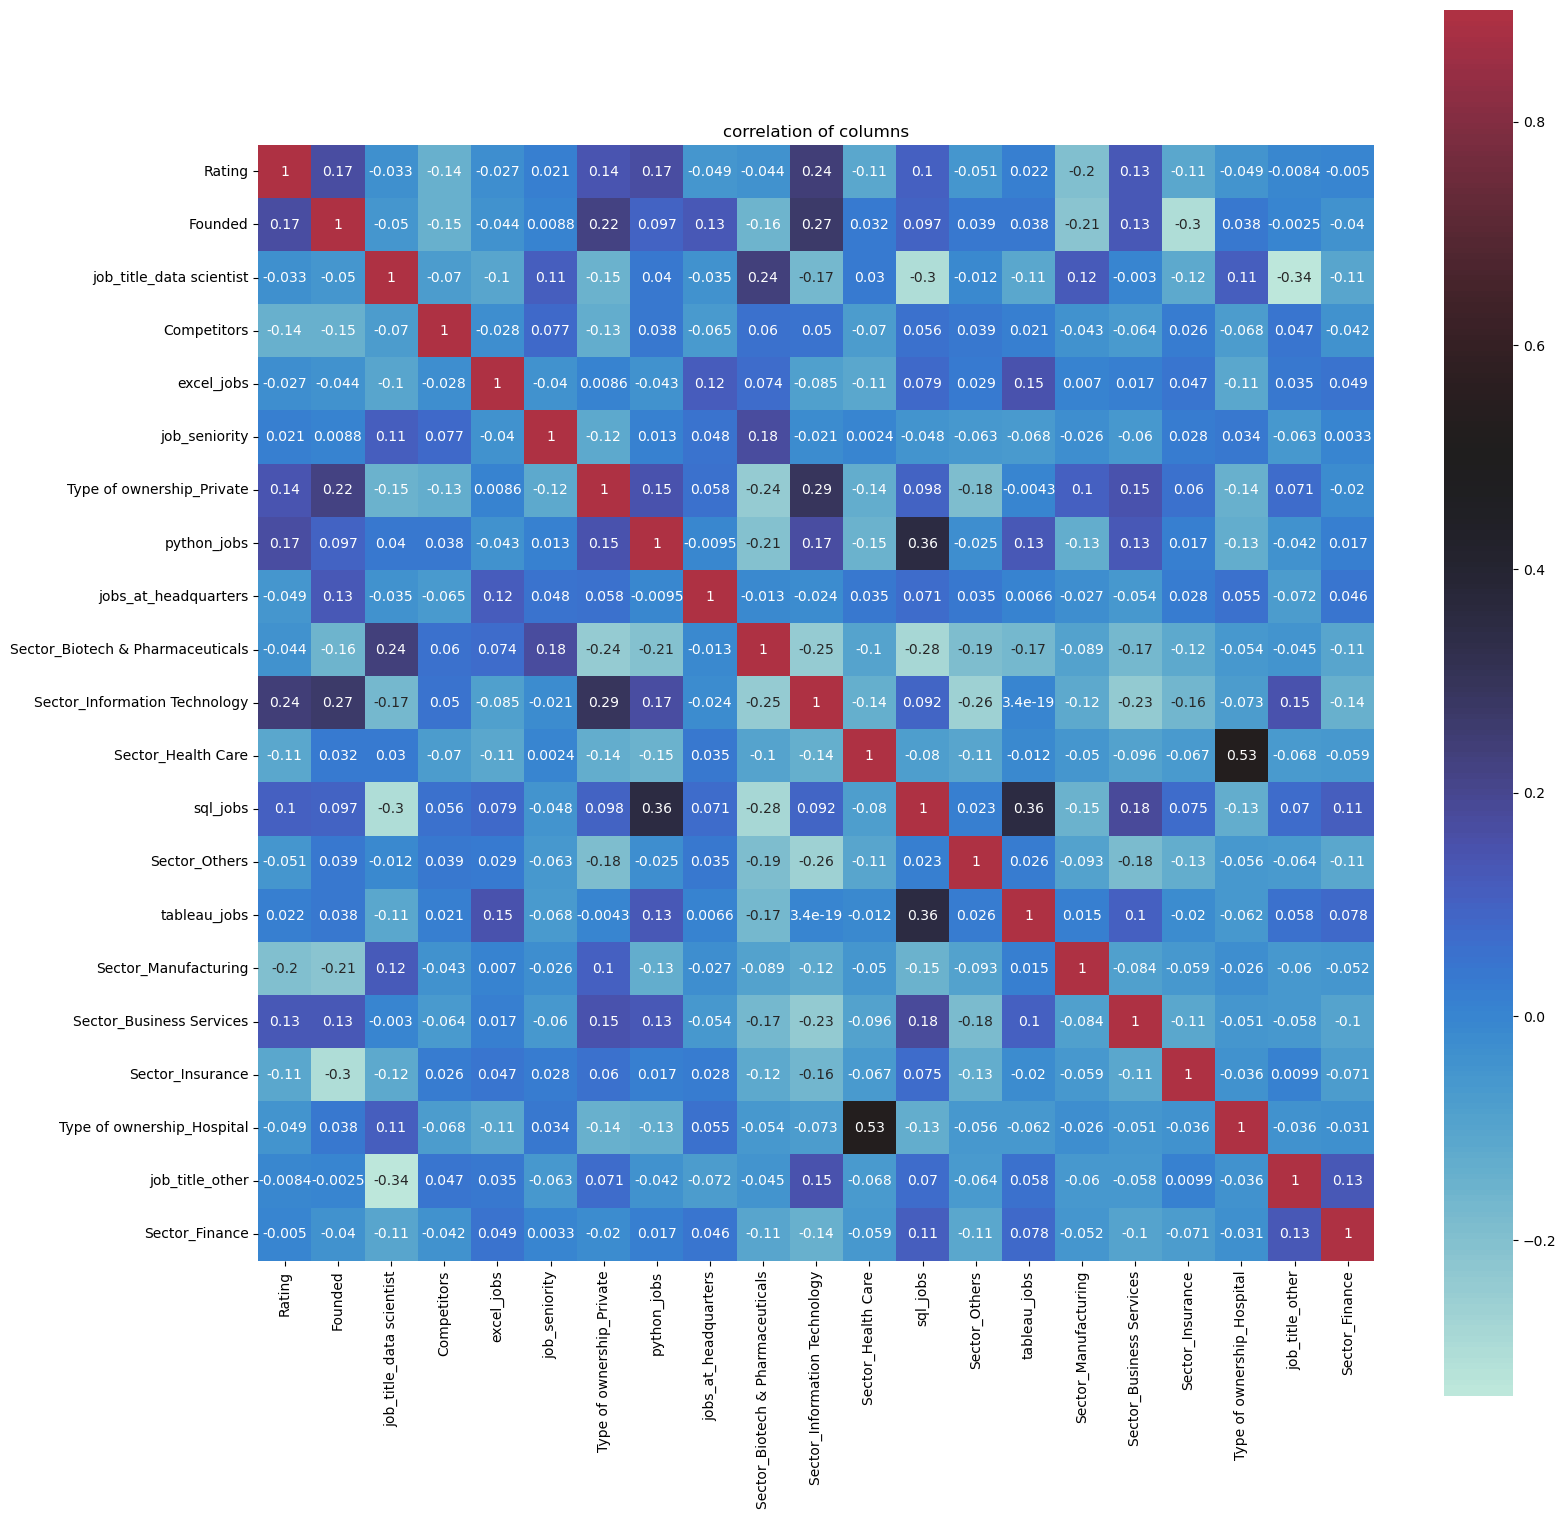

In [1697]:
corr=x.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr,annot=True,vmax=0.9,center=0.5, square=True,)
plt.title('correlation of columns')

In [1699]:
x.head()

,Rating,Founded,job_title_data scientist,Competitors,excel_jobs,job_seniority,Type of ownership_Private,python_jobs,jobs_at_headquarters,Sector_Biotech & Pharmaceuticals,Sector_Information Technology,Sector_Health Care,sql_jobs,Sector_Others,tableau_jobs,Sector_Manufacturing,Sector_Business Services,Sector_Insurance,Type of ownership_Hospital,job_title_other,Sector_Finance
0,3.8,1973,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,3.4,1984,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,4.8,2010,1,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0
3,3.8,1965,1,3,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0
4,2.9,1998,1,3,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0


In [1703]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [1705]:
X_train[['Rating','Founded']]=scaler.fit_transform(X_train[['Rating','Founded']])

In [1707]:
X_test[['Rating','Founded']]=scaler.transform(X_test[['Rating','Founded']])

# MODEL BUILDING 

In [1710]:
from sklearn.model_selection import cross_val_score

In [1712]:
# testing with Linear regression model
#cretaing a pipepline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
#def the pipeline
pipeline=Pipeline([('scaler',StandardScaler()),
                  ('lnr',LinearRegression())])
scores=cross_val_score(pipeline,x,y,cv=5,scoring='neg_root_mean_squared_error')
print('Cross-validation scores:',scores)
print('mean neg_root_mean_squared_error:',scores.mean())

Cross-validation scores: [-27.32542735 -26.86386671 -30.94900875 -28.88624054 -30.11992986]
mean neg_root_mean_squared_error: -28.82889464163559


In [1716]:
# testing with Lasso regression model
from sklearn.linear_model import Lasso
pipeline=Pipeline([('scaler',StandardScaler()),
                  ('lasso',Lasso())])
scores=cross_val_score(pipeline,x,y,cv=5,scoring='neg_root_mean_squared_error')
print('Cross-Validation Scores:',scores)
print('Mean neg_root_mean_squared_error:',scores.mean())

Cross-Validation Scores: [-27.42508375 -27.40062361 -31.02062253 -28.90056919 -29.78299254]
Mean neg_root_mean_squared_error: -28.905978321919985


In [1718]:
# testing with RandomForest model
from sklearn.ensemble import RandomForestRegressor
pipeline=Pipeline([('scaler',StandardScaler()),
                  ('model',RandomForestRegressor())])
scores=cross_val_score(pipeline,x,y,cv=10,scoring='neg_root_mean_squared_error')
print('Cross-Validation Scores:',scores)
print('Mean neg_root_mean_squared_error:',scores.mean())

Cross-Validation Scores: [-23.62965104 -26.39998972 -14.55670972 -21.05180338 -10.15764703
 -21.06660741 -17.45956768 -22.08394961 -22.2132869  -12.29607211]
Mean neg_root_mean_squared_error: -19.091528460060285


In [1720]:
# testing with GradientBoosting model
from sklearn.ensemble import GradientBoostingRegressor
pipeline=Pipeline([('scaler',StandardScaler()),
                  ('model',GradientBoostingRegressor())])
scores=cross_val_score(pipeline,x,y,cv=10,scoring='neg_root_mean_squared_error')
print('Cross-Validation Scores:',scores)
print('Mean neg_root_mean_squared_error:',scores.mean())

Cross-Validation Scores: [-25.72357529 -29.28289092 -22.29918898 -25.07234158 -23.70273189
 -26.13163645 -24.70545147 -25.12828813 -26.75958467 -23.98103473]
Mean neg_root_mean_squared_error: -25.278672413039576


**RMSE Scores**:                                                                                 
**Linear regression**: -28.82889464163559                                                                    
**Lasso regression**:  -28.905978321919985                                                                                               
**RandomForest**:      -19.091528460060285                                                                               
**GradientBoosting**: -25.278672413039576                                                                           


In [1734]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [1736]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [1738]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [1740]:
x.columns

Index(['Rating', 'Founded', 'Competitors', 'Sector_Health Care',
       'Sector_Business Services', 'Sector_Information Technology',
       'Sector_Biotech & Pharmaceuticals', 'Sector_Manufacturing',
       'Sector_Others', 'Sector_Insurance', 'Sector_Finance',
       'Type of ownership_Private', 'Type of ownership_Hospital',
       'job_title_data scientist', 'job_title_other', 'jobs_at_headquarters',
       'job_seniority', 'excel_jobs', 'python_jobs', 'tableau_jobs',
       'sql_jobs'],
      dtype='object')

In [1742]:
#rearraging the columns
x=x[['Rating', 'Founded', 'Competitors','Sector_Health Care', 'Sector_Business Services','Sector_Information Technology',
'Sector_Biotech & Pharmaceuticals','Sector_Manufacturing','Sector_Others', 'Sector_Insurance','Sector_Finance','Type of ownership_Private',
     'Type of ownership_Hospital','job_title_data scientist','job_title_other','jobs_at_headquarters','job_seniority',
'excel_jobs','python_jobs', 'tableau_jobs', 'sql_jobs'
]]

In [1744]:
x.head()

,Rating,Founded,Competitors,Sector_Health Care,Sector_Business Services,Sector_Information Technology,Sector_Biotech & Pharmaceuticals,Sector_Manufacturing,Sector_Others,Sector_Insurance,Sector_Finance,Type of ownership_Private,Type of ownership_Hospital,job_title_data scientist,job_title_other,jobs_at_headquarters,job_seniority,excel_jobs,python_jobs,tableau_jobs,sql_jobs
0,3.8,1973,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0
1,3.4,1984,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,4.8,2010,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
3,3.8,1965,3,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
4,2.9,1998,3,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1


**MAKING PREDICTIONS**

In [1747]:
#rf = RandomForestRegressor()
##rf.fit(X, y)

In [1749]:
def Predict_salary(Rating,Founded,Competitors,Sector,ownership,job_title, job_in_headquarters, job_seniority, job_skills):
    
    prediction_input= []

    # Create a dummy 2D array with two features
    dummy_input = np.zeros((1, 2))
    dummy_input[0, 0] = Rating
    dummy_input[0, 1] = Founded
    scaled_values = scaler.transform(dummy_input)
    prediction_input.append(scaled_values[0, 0])  # Scaled Rating
    prediction_input.append(scaled_values[0, 1])  # Scaled Founded 
    #the input values of Rating & Founded columns are scaled using StandardScaler before adding to prediction_input list
    
    prediction_input.append(Competitors)
    #directly added to input list as number

    
    # one-hot encode the input sector variable so that it matches the format expected by the prediction model.  
    Sector_list=['Sector_Health Care', 'Sector_Business Services','Sector_Information Technology','Sector_Biotech & Pharmaceuticals',
                 'Sector_Manufacturing','Sector_Others', 'Sector_Insurance','Sector_Finance']
    
    temp=[0]*len(Sector_list)
    for index in range(0,len(Sector_list)):
        if Sector_list[index]== 'Sector_'+Sector:
            temp[index]=1
            break
    prediction_input=prediction_input+temp
    
    #one-hot encode the input owership variable so that it matches the format expected by the prediction model.
    ownership_list=['Type of ownership_Private','Type of ownership_Hospital'] 
    temp=[0]* len(ownership_list)
    for index in range(0,len(ownership_list)):
        if ownership_list[index]== 'Type of ownership' + ownership:
            temp[index]=1
            break
    prediction_input=prediction_input + temp
    
    #one-hot encode the input job_title variable so that it matches the format expected by the prediction model.
    title_list=['job_title_data scientist','job_title_other']
    temp=[0]*len(title_list)
    for index in range(0,len(title_list)):
        if title_list[index] == 'job_title_' + job_title:
            temp[index]=1
            break
    prediction_input=prediction_input + temp

    prediction_input.append(job_in_headquarters)
    #input the job_in_headquarters coluimn with int  as 0 and 1

    
    seniority_map #that we used before at encoding Ordinal categorical varibales for job_seniority column
    prediction_input.append(seniority_map[job_seniority])

    
    temp = np.zeros(shape=(1, 4))[0].tolist()
    if 'excel' in job_skills:
        temp[0]=1
    if 'python' in job_skills:
        temp[1]=1
    if 'tableau' in job_skills:
        temp[2]=1
    if 'sql' in job_skills:
        temp[3]=1
    prediction_input =prediction_input + temp
    
    
    return rf.predict([prediction_input])[0]
    

# Prediction 1
**Input sequence:**  'Rating', 'Founded', 'Competitors_count', 'Sector', 'Type_of_ownership', 'job_title', 'job_in_headquarters', 'job_seniority', 'job_skills'



In [1752]:
salary = Predict_salary(4.5, 1969, 3, 'Information Technology', 'Private', 'data scientist', 1, 'sr', ['python', 'sql', 'tableau'])
print('Estimated salary (range): {}(USD) to {}(USD) per annum.'.format(int(salary*1000)-9000, int(salary*1000)+9000))

Estimated salary (range): 92640(USD) to 110640(USD) per annum.


C:\Users\ranga\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ranga\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Prediction 2

In [1760]:
salary = Predict_salary(3.0, 2000, 1, 'Health Care', 'Public', 'data analyst', 0, 'jr', ['python', 'tableau'])
print('Estimated salary (range): {}(USD) to {}(USD) per annum.'.format(int(salary*1000)-9000, int(salary*1000)+9000))

Estimated salary (range): 109618(USD) to 127618(USD) per annum.


C:\Users\ranga\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ranga\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
